In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"premagarwal","key":"43d77feb139e583be24333d82632fca8"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d shreydan/kitti-dataset-yolo-format -p /tmp

Dataset URL: https://www.kaggle.com/datasets/shreydan/kitti-dataset-yolo-format
License(s): unknown
  0% 0.00/5.23M [00:00<?, ?B/s]
100% 5.23M/5.23M [00:00<00:00, 87.4MB/s]


In [ ]:
!kaggle datasets download -d klemenko/kitti-dataset -p /tmp

!unzip /tmp/weather-data.zip -d /tmp


Dataset URL: https://www.kaggle.com/datasets/klemenko/kitti-dataset
License(s): other
100% 22.5G/22.5G [05:02<00:00, 46.3MB/s]
100% 22.5G/22.5G [05:02<00:00, 79.9MB/s]
unzip:  cannot find or open /tmp/weather-data.zip, /tmp/weather-data.zip.zip or /tmp/weather-data.zip.ZIP.


In [ ]:
!kaggle datasets download -d klemenko/kitti-dataset

Dataset URL: https://www.kaggle.com/datasets/klemenko/kitti-dataset
License(s): other
 15% 3.29G/22.5G [00:29<01:40, 205MB/s]

In [ ]:
import zipfile
import os

# Unzip the file
zip_file_path = '/content/kitti-dataset.zip'
extract_to_path = '/content/dataset/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

# List files in the extracted directory to verify
os.listdir(extract_to_path)


['data_object_image_2',
 'data_object_image_3',
 'data_object_label_2',
 'data_object_calib']

In [ ]:
import zipfile
import os

# Unzip the file
zip_file_path = '/tmp/kitti-dataset-yolo-format.zip'
extract_to_path = '/content/dataset_yolo/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

# List files in the extracted directory to verify
os.listdir(extract_to_path)

['labels',
 'labels_with_dont_care',
 'classes_with_dont_care.json',
 'classes.json']

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.7/793.7 kB 4.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
%env WANDB_DISABLED=True

env: WANDB_DISABLED=True


In [ ]:
from ultralytics import YOLO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import json
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm
import shutil
from PIL import Image

In [ ]:
base_dir = Path('content/dataset/')
img_path = Path('/content/dataset/data_object_image_2/training/image_2')
label_path = Path('/content/dataset_yolo/labels')
with open('/content/dataset_yolo/classes.json','r') as f:
    classes = json.load(f)

classes

{'Car': 0,
 'Pedestrian': 1,
 'Van': 2,
 'Cyclist': 3,
 'Truck': 4,
 'Misc': 5,
 'Tram': 6,
 'Person_sitting': 7}

In [ ]:
ims = sorted(list(img_path.glob('*')))
labels = sorted(list(label_path.glob('*')))

# Print the first few entries to verify
print(ims[:2])
print(labels[:2])


[PosixPath('/content/dataset/data_object_image_2/training/image_2/000000.png'), PosixPath('/content/dataset/data_object_image_2/training/image_2/000001.png')]
[PosixPath('/content/dataset_yolo/labels/000000.txt'), PosixPath('/content/dataset_yolo/labels/000001.txt')]


In [ ]:
ims = sorted(list(img_path.glob('*')))
labels = sorted(list(label_path.glob('*')))
pairs = list(zip(ims,labels))
pairs[:2]

[(PosixPath('/content/dataset/data_object_image_2/training/image_2/000000.png'),
  PosixPath('/content/dataset_yolo/labels/000000.txt')),
 (PosixPath('/content/dataset/data_object_image_2/training/image_2/000001.png'),
  PosixPath('/content/dataset_yolo/labels/000001.txt'))]

In [ ]:
train, test = train_test_split(pairs,test_size=0.1,shuffle=True)
len(train), len(test)

(6732, 749)

In [ ]:
train_path = Path('train').resolve()
train_path.mkdir(exist_ok=True)
valid_path = Path('valid').resolve()
valid_path.mkdir(exist_ok=True)

In [ ]:
for t_img, t_lb in tqdm(train):
    im_path = train_path / t_img.name
    lb_path = train_path / t_lb.name
    shutil.copy(t_img,im_path)
    shutil.copy(t_lb,lb_path)

  0%|          | 0/6732 [00:00<?, ?it/s]

In [ ]:
for t_img, t_lb in tqdm(test):
    im_path = valid_path / t_img.name
    lb_path = valid_path / t_lb.name
    shutil.copy(t_img,im_path)
    shutil.copy(t_lb,lb_path)

  0%|          | 0/749 [00:00<?, ?it/s]

In [ ]:
yaml_file = 'names:\n'
yaml_file += '\n'.join(f'- {c}' for c in classes)
yaml_file += f'\nnc: {len(classes)}'
yaml_file += f'\ntrain: {str(train_path)}\nval: {str(valid_path)}'
with open('kitti.yaml','w') as f:
    f.write(yaml_file)

In [ ]:
!cat kitti.yaml

names:
- Car
- Pedestrian
- Van
- Cyclist
- Truck
- Misc
- Tram
- Person_sitting
nc: 8
train: /content/train
val: /content/valid

In [ ]:
model = YOLO('yolov8n.yaml')
model = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 67.5MB/s]


In [ ]:
train_results = model.train(
    data='/content/kitti.yaml',
    epochs=10,
    patience=3,
    mixup=0.1,
    project='yolov8n-kitti'
)

Ultralytics YOLOv8.2.30 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/kitti.yaml, epochs=10, time=None, patience=3, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=yolov8n-kitti, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_bo

100%|██████████| 755k/755k [00:00<00:00, 14.8MB/s]


Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/train... 6732 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6732/6732 [00:48<00:00, 138.96it/s]


train: New cache created: /content/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/valid... 749 images, 0 backgrounds, 0 corrupt: 100%|██████████| 749/749 [00:05<00:00, 131.59it/s]


val: New cache created: /content/valid.cache
Plotting labels to yolov8n-kitti/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to yolov8n-kitti/train2
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.414      1.935      1.112         46        640: 100%|██████████| 421/421 [1:50:28<00:00, 15.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [01:43<00:00,  4.33s/it]


                   all        749       4154      0.398      0.332      0.341      0.199

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.269      1.238      1.068         85        640: 100%|██████████| 421/421 [1:49:31<00:00, 15.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [01:43<00:00,  4.30s/it]

                   all        749       4154      0.501      0.398       0.38       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.229       1.05      1.057         83        640: 100%|██████████| 421/421 [1:49:49<00:00, 15.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [01:43<00:00,  4.32s/it]

                   all        749       4154       0.54      0.486      0.479      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G       1.18     0.9366      1.043         56        640: 100%|██████████| 421/421 [1:50:44<00:00, 15.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [01:48<00:00,  4.52s/it]

                   all        749       4154      0.672      0.465      0.541       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.134     0.8589      1.019         66        640: 100%|██████████| 421/421 [1:51:19<00:00, 15.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [01:48<00:00,  4.51s/it]

                   all        749       4154      0.541      0.567      0.572      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.098     0.8023      1.007         81        640: 100%|██████████| 421/421 [1:51:25<00:00, 15.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [01:49<00:00,  4.54s/it]

                   all        749       4154      0.757      0.512      0.615       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.064     0.7542     0.9928         55        640: 100%|██████████| 421/421 [1:49:32<00:00, 15.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [01:45<00:00,  4.41s/it]

                   all        749       4154      0.737      0.533      0.638      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      1.025     0.7141     0.9776         72        640: 100%|██████████| 421/421 [1:51:35<00:00, 15.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [01:42<00:00,  4.26s/it]

                   all        749       4154      0.744      0.554      0.629      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      0.998     0.6789     0.9669         83        640: 100%|██████████| 421/421 [1:52:07<00:00, 15.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [01:39<00:00,  4.14s/it]

                   all        749       4154      0.754      0.578      0.682      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.9657     0.6476      0.956         65        640: 100%|██████████| 421/421 [1:47:21<00:00, 15.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [01:41<00:00,  4.21s/it]

                   all        749       4154      0.749      0.611      0.684      0.436



10 epochs completed in 18.697 hours.
Optimizer stripped from yolov8n-kitti/train2/weights/last.pt, 6.2MB
Optimizer stripped from yolov8n-kitti/train2/weights/best.pt, 6.2MB

Validating yolov8n-kitti/train2/weights/best.pt...
Ultralytics YOLOv8.2.30 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3007208 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  83%|████████▎ | 20/24 [01:22<00:14,  3.50s/it]

In [ ]:
valid_results = model.val()

Ultralytics YOLOv8.2.30 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3007208 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/valid.cache... 749 images, 0 backgrounds, 0 corrupt: 100%|██████████| 749/749 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [01:37<00:00,  2.06s/it]


                   all        749       4154      0.747      0.611      0.684      0.436
                   Car        676       2979      0.911      0.787      0.903      0.678
            Pedestrian        177        422      0.776      0.512      0.629      0.341
                   Van        216        316       0.75      0.642      0.728      0.515
               Cyclist        108        152      0.809       0.53      0.642      0.368
                 Truck        105        109      0.852      0.789      0.839      0.621
                  Misc         83        104      0.714      0.462      0.518       0.34
                  Tram         36         55      0.615      0.698      0.733      0.418
        Person_sitting          9         17      0.551      0.471      0.481      0.204
Speed: 1.0ms preprocess, 103.3ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to yolov8n-kitti/train22


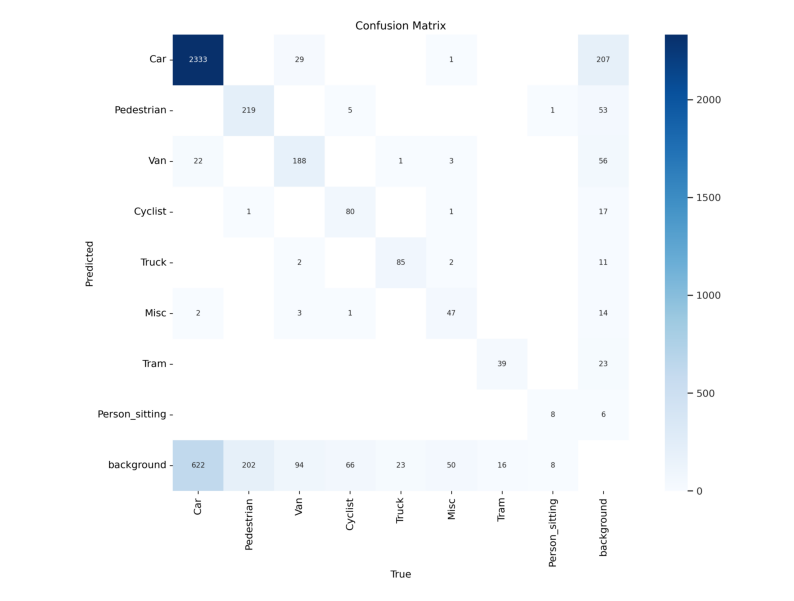

In [ ]:
plt.figure(figsize=(10,20))
plt.imshow(Image.open('/content/yolov8n-kitti/train22/confusion_matrix.png'))
plt.axis('off')
plt.show()

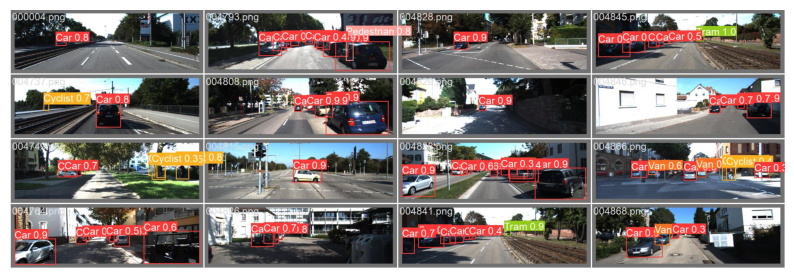

In [ ]:
plt.figure(figsize=(10,20))
plt.imshow(Image.open('/content/yolov8n-kitti/train22/val_batch0_pred.jpg'))
plt.axis('off')
plt.show()

In [ ]:
preds = model.predict([test[idx][0] for idx in np.random.randint(0,len(test),(20,))],save=True)


0: 640x640 4 Cars, 234.6ms
1: 640x640 3 Cars, 234.6ms
2: 640x640 9 Cars, 2 Pedestrians, 234.6ms
3: 640x640 3 Cars, 234.6ms
4: 640x640 2 Cars, 234.6ms
5: 640x640 3 Cars, 234.6ms
6: 640x640 8 Cars, 2 Vans, 234.6ms
7: 640x640 5 Cars, 2 Vans, 234.6ms
8: 640x640 8 Cars, 234.6ms
9: 640x640 1 Pedestrian, 234.6ms
10: 640x640 2 Pedestrians, 234.6ms
11: 640x640 4 Cars, 234.6ms
12: 640x640 6 Cars, 234.6ms
13: 640x640 2 Cars, 234.6ms
14: 640x640 3 Cars, 1 Truck, 234.6ms
15: 640x640 1 Car, 234.6ms
16: 640x640 2 Cars, 234.6ms
17: 640x640 3 Cars, 234.6ms
18: 640x640 1 Pedestrian, 234.6ms
19: 640x640 6 Cars, 4 Vans, 1 Cyclist, 234.6ms
Speed: 7.3ms preprocess, 234.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to yolov8n-kitti/train23


In [ ]:
preds = list(Path('/content/yolov8n-kitti/train23').glob('*'))

In [ ]:
def plot_images(images):
    num_images = len(images)
    rows = num_images
    cols = 1
    fig, axes = plt.subplots(rows, cols, figsize=(15, 80))
    for ax in axes.flat:
        ax.axis('off')
    for i, img_path in enumerate(images):
        img = Image.open(img_path)
        axes[i].imshow(img)

    plt.tight_layout()
    plt.show()

plot_images(preds)

In [ ]:
plot_images(preds)

In [ ]:
import shutil
from google.colab import files

# Specify the folder you want to zip
folder_to_zip = '/content/yolov8n-kitti/train23'  # Change this to your folder's name
output_filename = 'prediction_folder.zip'

# Zip the folder
shutil.make_archive(output_filename.replace('.zip', ''), 'zip', folder_to_zip)

# Download the zipped folder
files.download(output_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import shutil
from google.colab import files

# Specify the folder you want to zip
folder_to_zip = '/content/yolov8n-kitti/train22'  # Change this to your folder's name
output_filename = 'validation_folder.zip'

# Zip the folder
shutil.make_archive(output_filename.replace('.zip', ''), 'zip', folder_to_zip)

# Download the zipped folder
files.download(output_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import shutil
from google.colab import files

# Specify the folder you want to zip
folder_to_zip = '/content/yolov8n-kitti/train2'  # Change this to your folder's name
output_filename = 'results.zip'

# Zip the folder
shutil.make_archive(output_filename.replace('.zip', ''), 'zip', folder_to_zip)

# Download the zipped folder
files.download(output_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   epoch  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1          1.4143         1.93500          1.1120   
1      2          1.2694         1.23820          1.0683   
2      3          1.2287         1.04980          1.0572   
3      4          1.1801         0.93660          1.0431   
4      5          1.1341         0.85887          1.0188   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.39849            0.33190           0.34065   
1               0.50059            0.39816           0.38015   
2               0.53968            0.48636           0.47900   
3               0.67169            0.46508           0.54106   
4               0.54149            0.56723           0.57233   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.19890        1.2739       1.19450        1.0680  0.000277   
1              0.23011        1.2150       1.04080        1.0727  0.000500   
2              0.281

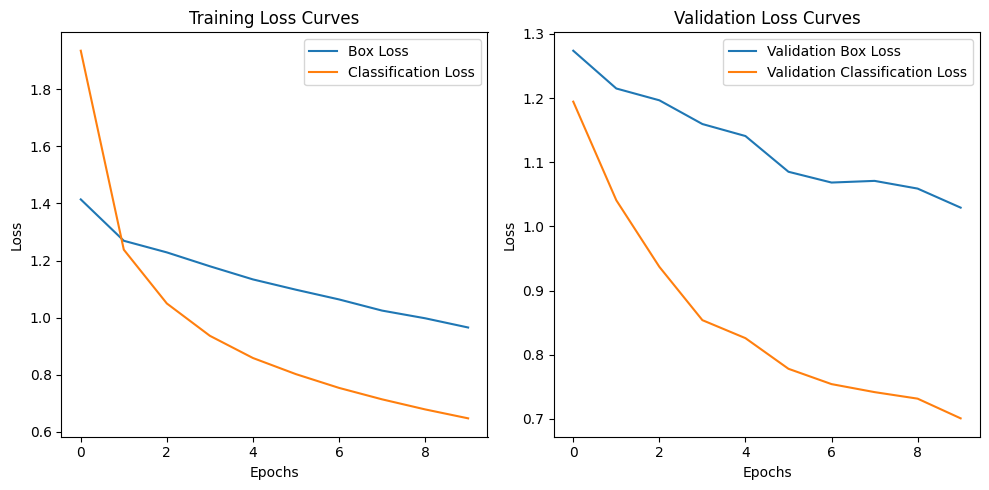

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Specify the log directory
log_dir = '/content/yolov8n-kitti/train2'  # Update with your actual path
log_file = os.path.join(log_dir, 'results.csv')

# Load the CSV file
log_data = pd.read_csv(log_file)
log_data.columns = log_data.columns.str.strip()  # Remove leading/trailing spaces
print(log_data.head())

# Extract metrics
epochs = log_data.index
box_loss = log_data['train/box_loss'] if 'train/box_loss' in log_data.columns else None
obj_loss = log_data['train/obj_loss'] if 'train/obj_loss' in log_data.columns else None
cls_loss = log_data['train/cls_loss'] if 'train/cls_loss' in log_data.columns else None
val_box_loss = log_data['val/box_loss'] if 'val/box_loss' in log_data.columns else None
val_obj_loss = log_data['val/obj_loss'] if 'val/obj_loss' in log_data.columns else None
val_cls_loss = log_data['val/cls_loss'] if 'val/cls_loss' in log_data.columns else None

# Plot loss curves
plt.figure(figsize=(10, 5))

# Plot training loss curves
if box_loss is not None:
    plt.subplot(1, 2, 1)
    plt.plot(epochs, box_loss, label='Box Loss')
if obj_loss is not None:
    plt.plot(epochs, obj_loss, label='Objectness Loss')
if cls_loss is not None:
    plt.plot(epochs, cls_loss, label='Classification Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curves')
plt.legend()

# Plot validation loss curves
if val_box_loss is not None:
    plt.subplot(1, 2, 2)
    plt.plot(epochs, val_box_loss, label='Validation Box Loss')
if val_obj_loss is not None:
    plt.plot(epochs, val_obj_loss, label='Validation Objectness Loss')
if val_cls_loss is not None:
    plt.plot(epochs, val_cls_loss, label='Validation Classification Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss Curves')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import os

log_dir = '/content/yolov8n-kitti/train2'  # Update with your actual path
print(os.listdir(log_dir))


['train_batch2.jpg', 'weights', 'val_batch0_labels.jpg', 'train_batch0.jpg', 'val_batch1_pred.jpg', 'R_curve.png', 'labels_correlogram.jpg', 'confusion_matrix_normalized.png', 'PR_curve.png', 'val_batch0_pred.jpg', 'results.png', 'val_batch1_labels.jpg', 'P_curve.png', 'F1_curve.png', 'confusion_matrix.png', 'labels.jpg', 'train_batch1.jpg', 'val_batch2_labels.jpg', 'val_batch2_pred.jpg', 'events.out.tfevents.1718013253.b3257c65584c.177.0', 'args.yaml', 'results.csv']
